In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
# READ GALAXY MAGNITUDES AND MAGNITUDE ERRORS FROM FILE

f = 'scratch.txt'
data = np.genfromtxt(f)
data.shape

(3689, 31)

In [3]:
# GENERATE HARMONIZED TABLE OF MAGNITUDES (PREFER COG VALUES OVER GALFIT VALUES)

mags = np.zeros([data.shape[0], 5])

mask = (data[:, 1] > 0.) & (data[:, 3] > 0.)
for i in range(5):
    mags[mask, i] = data[mask, 2 * i + 1]
    
mask = (data[:, 21] > 0.) & (data[:, 23] > 0.)
for i in range(5):
    mags[mask, i] = data[mask, 2 * i + 21]
    

557


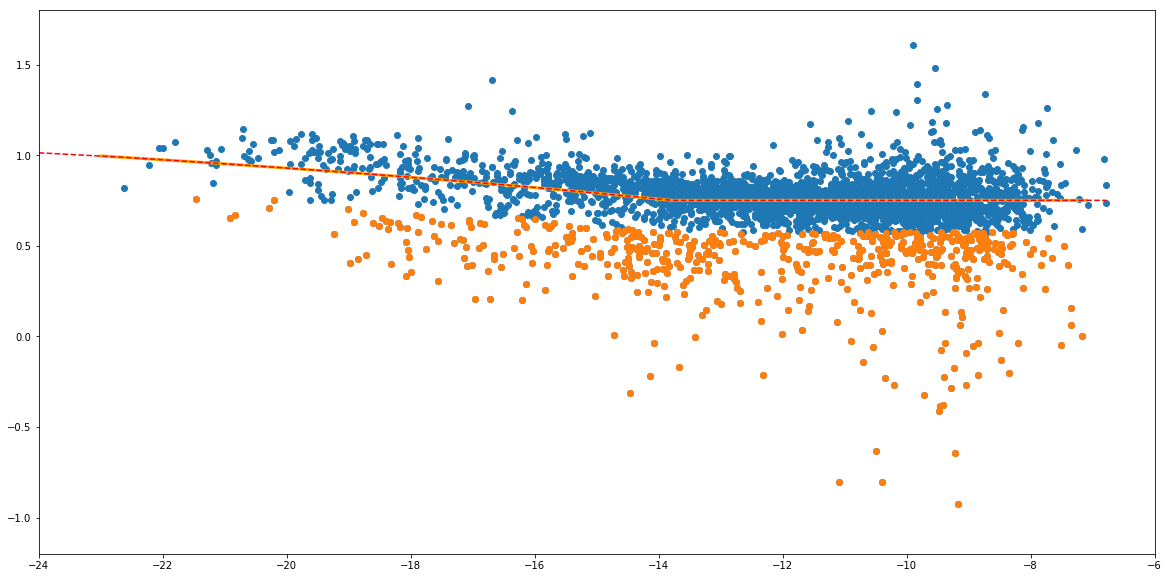

In [24]:
# DETERMINE NUMBER OF CANDIDATE STAR-FORMING GALAXIES VIA DISTANCE BELOW RED SEQUENCE

# choose color to plot
bands = [1, 3]

# choose parameters of double power-law fit
alpha = 1333.
beta = [1.685, 0.578]
mag0 = -13.81
c0 = 0.751

#-----

fig = plt.figure(figsize = (20, 10))
ax = plt.subplot(111)
ax.scatter(mags[:, 1] - 31.09, (mags[:, bands[0]] - mags[:, bands[1]]))

x = np.arange(-23., -7., 0.1)
y = c0 + np.log10(2.0 ** ((beta[1] - beta[0])/ alpha) * (1. + (x / mag0) ** alpha) ** ((beta[0] - beta[1]) / alpha))
ax.plot(x, y, c = 'orange', lw = 3)

func = interp1d(x, y, kind = 'cubic', bounds_error = False, fill_value = "extrapolate")
ax.plot(np.sort(mags[:, 1]) - 31.09, func(np.sort(mags[:, 1]) - 31.09), 'r--')

# count number of galaxies lying n * sigma or more below red sequence
n = 3.
sigma = 0.058

count = 0
mask = []
for i in range(data.shape[0]):
    if (mags[i, 1] - 31.09) >= -24. and (mags[i, 1] - 31.09) < -6.:
        if (mags[i, bands[0]] - mags[i, bands[1]]) <= (func(mags[i, 1] - 31.09) - (n * sigma)):
            mask.append(i)
            count += 1
            
print (count)

# identify candidate star-forming galaxies
ax.scatter(mags[mask, 1] - 31.09, (mags[mask, bands[0]] - mags[mask, bands[1]]))

ax.set_xlim(-24., -6.)

# u-g limits
#ax.set_ylim(-2.5, 3.)
# g-i limits
ax.set_ylim(-1.2, 1.8);

In [16]:
# CHECK OUTLIERS IN CMD SPACE

print (mags[((mags[:, 0] - mags[:, 1]) > 20.), :])

[[  45.327   20.327 -100.      19.485   19.299]
 [  46.965   21.965 -100.      21.831   46.965]
 [  47.478   22.479 -100.      21.623   21.532]
 [  45.656   20.656 -100.      45.656   45.656]
 [  46.703   21.703 -100.      21.741   21.885]
 [  46.879   21.879 -100.      21.145   20.634]
 [  47.343   22.343 -100.      21.759   20.802]
 [  45.856   20.856 -100.      19.878   19.36 ]
 [  46.64    21.64  -100.      20.68    20.875]
 [  48.314   23.314 -100.      22.389   48.314]
 [  45.004   20.004 -100.      18.909   19.109]
 [  46.313   21.313 -100.      21.122   20.242]]
